<a href="https://colab.research.google.com/github/lucasdataanalytics/Data-Science-Pyhton/blob/main/EDA_Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ETAPAS**



* Entendimento do Negócio
* Compreensão dos Dados
* Tratamento e Limpeza dos Dados
* Análise



## Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando Arquivo


In [ ]:
df = pd.read_csv('/content/winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Sumário dos Dados


* unnamed - parece ser uma coluna de índice que podemos remover
* country - país onde o vinho foi feito (interessante)
* description - descrição do vinho
* designation - vinhedo dentro da adega de onde as uvas que fizeram o vinho foram coletadas.
* points - é o número de pontos que o vinho obteve em sua avaliação (precisamos entender a escala de pontos)
* price - preço da garrafa de vinho
* province - é a província (estado) onde o vinho foi feito
* region_1 - é a região onde o vinho foi feito
* region_2 - região mais específica dentro de uma vitícola (podemos remover isso)
* taster_name - nome do revisor
* taster_twitter_handle - perfil do Twitter do avaliador
* title - nome do vinho analisado (o ano de fabricação está no título)
* variety - tipo de uvas utilizadas na fabricação do vinho
* winery - adega onde o vinho foi feito.

## Perguntas

* **Qual país tem o melhor vinho?**
* **Existe relação entre o preço do vinho com  a qualidade?**
* **Existem tipos de uva de maior qualidade**
* **Qual o melhor vinho em cada faixa de preço**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [ ]:
df.describe()[['points','price']].round(2)

,points,price
count,150930.00,137235.00
mean,87.89,33.13
std,3.22,36.32
min,80.00,4.00
25%,86.00,16.00
50%,88.00,24.00
75%,90.00,40.00
max,100.00,2300.00


### Tabela de Classificação por Pontos

* **98-100** - Clássico
* **94-97**- Soberbo
* **90-93**- Excelente
* **87-89**- Muito bom
* **83-86**- Bom
* **80-82**- Aceitável

## Compreensão do Dados

In [ ]:
df['country'].value_counts().sort_values(ascending=False)

,count
country,
US,62397
Italy,23478
France,21098
Spain,8268
Chile,5816
Argentina,5631
Portugal,5322
Australia,4957
New Zealand,3320


In [ ]:
df['variety'].value_counts().sort_values(ascending=False)

,count
variety,
Chardonnay,14482
Pinot Noir,14291
Cabernet Sauvignon,12800
Red Blend,10062
Bordeaux-style Red Blend,7347
...,...
Groppello,1
Malvoisie,1
Huxelrebe,1


## Limpeza dos Dados

In [ ]:
df1 = df.copy()

In [ ]:
# Verificar o nome das colunas presentes no DataFrame
print(df1.columns)

# Eliminar apenas as colunas que existem
df1 = df1.drop(columns=[col for col in ['Unnamed: 0','designation','region_1','region_2'] if col in df1.columns], axis=1)

Index(['country', 'description', 'points', 'price', 'province', 'variety',
       'winery'],
      dtype='object')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   points       150930 non-null  int64  
 3   price        137235 non-null  float64
 4   province     150925 non-null  object 
 5   variety      150930 non-null  object 
 6   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ MB


In [ ]:
proporcao = (df1['price'].count() / df1.shape[0])
print(f'{proporcao:.2%}')

90.93%


In [ ]:
df1 = df1.dropna(subset=['country','price','province'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137230 entries, 0 to 150929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      137230 non-null  object 
 1   description  137230 non-null  object 
 2   points       137230 non-null  int64  
 3   price        137230 non-null  float64
 4   province     137230 non-null  object 
 5   variety      137230 non-null  object 
 6   winery       137230 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.4+ MB


## EDA (Exploratory Data Analysis)

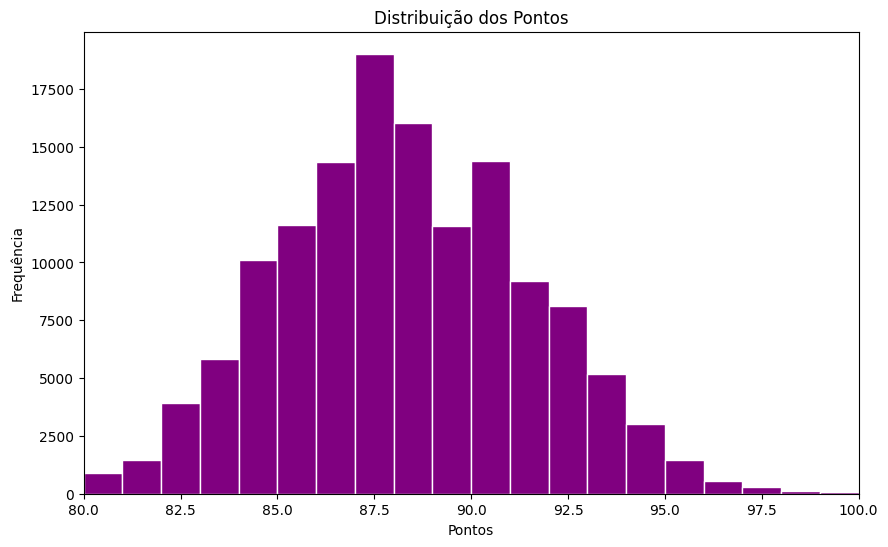

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data=df1, x='points', bins=20, color='purple', edgecolor='white')
plt.xlim(80, 100)
plt.title('Distribuição dos Pontos')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.show()

In [ ]:
top_10_paises = df1['country'].value_counts().sort_values(ascending=False)[:10]
top_10_paises

,count
country,
US,62139
Italy,18784
France,14785
Spain,8160
Chile,5766
Argentina,5587
Australia,4894
Portugal,4176
New Zealand,3070


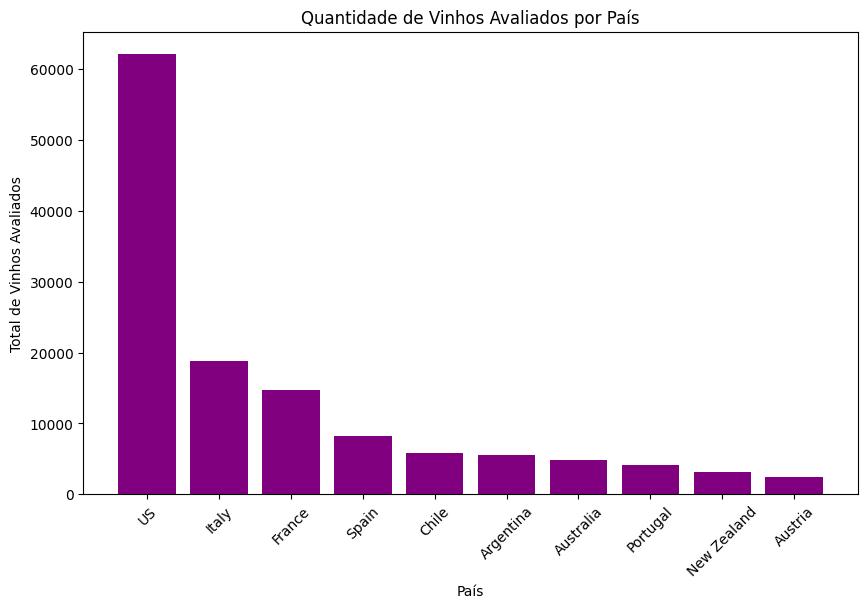

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_paises.index, top_10_paises.values, color='purple')
plt.title('Quantidade de Vinhos Avaliados por País')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Total de Vinhos Avaliados')
plt.show()

In [ ]:
melhores_vinhos = df1.groupby('country').agg({'points': 'mean', 'price': 'mean'})
melhores_vinhos = melhores_vinhos.sort_values(by='points', ascending=False)[:10]
melhores_vinhos.style.background_gradient(cmap='Purples', subset=['points'])

,points,price
country,,
England,92.750000,47.500000
Austria,89.190898,31.192106
Germany,88.610567,39.011078
France,88.603314,45.619885
Italy,88.445006,37.547913
Canada,88.221649,34.628866
Portugal,88.176724,26.332615
Slovenia,88.172840,28.061728
Morocco,88.166667,18.833333


<ipython-input-112-1ffa2175ee62>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


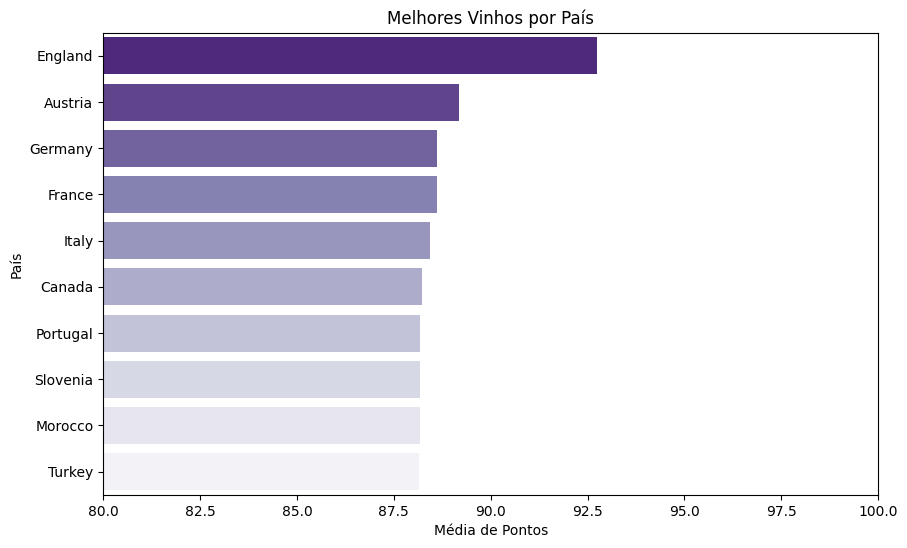

In [ ]:
y = melhores_vinhos.index.to_series()
x = melhores_vinhos['points']

plt.figure(figsize=(10, 6))
plt.xlim(80, 100)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Melhores Vinhos por País')
plt.xlabel('Média de Pontos')
plt.ylabel('País')
plt.show()

In [ ]:
acima_94_pontos = df1[df1['points'] >= 94]
acima_94_pontos['country'].value_counts()

,count
country,
US,3037
France,1009
Italy,768
Spain,148
Portugal,131
Australia,127
Austria,112
Germany,105
Argentina,52


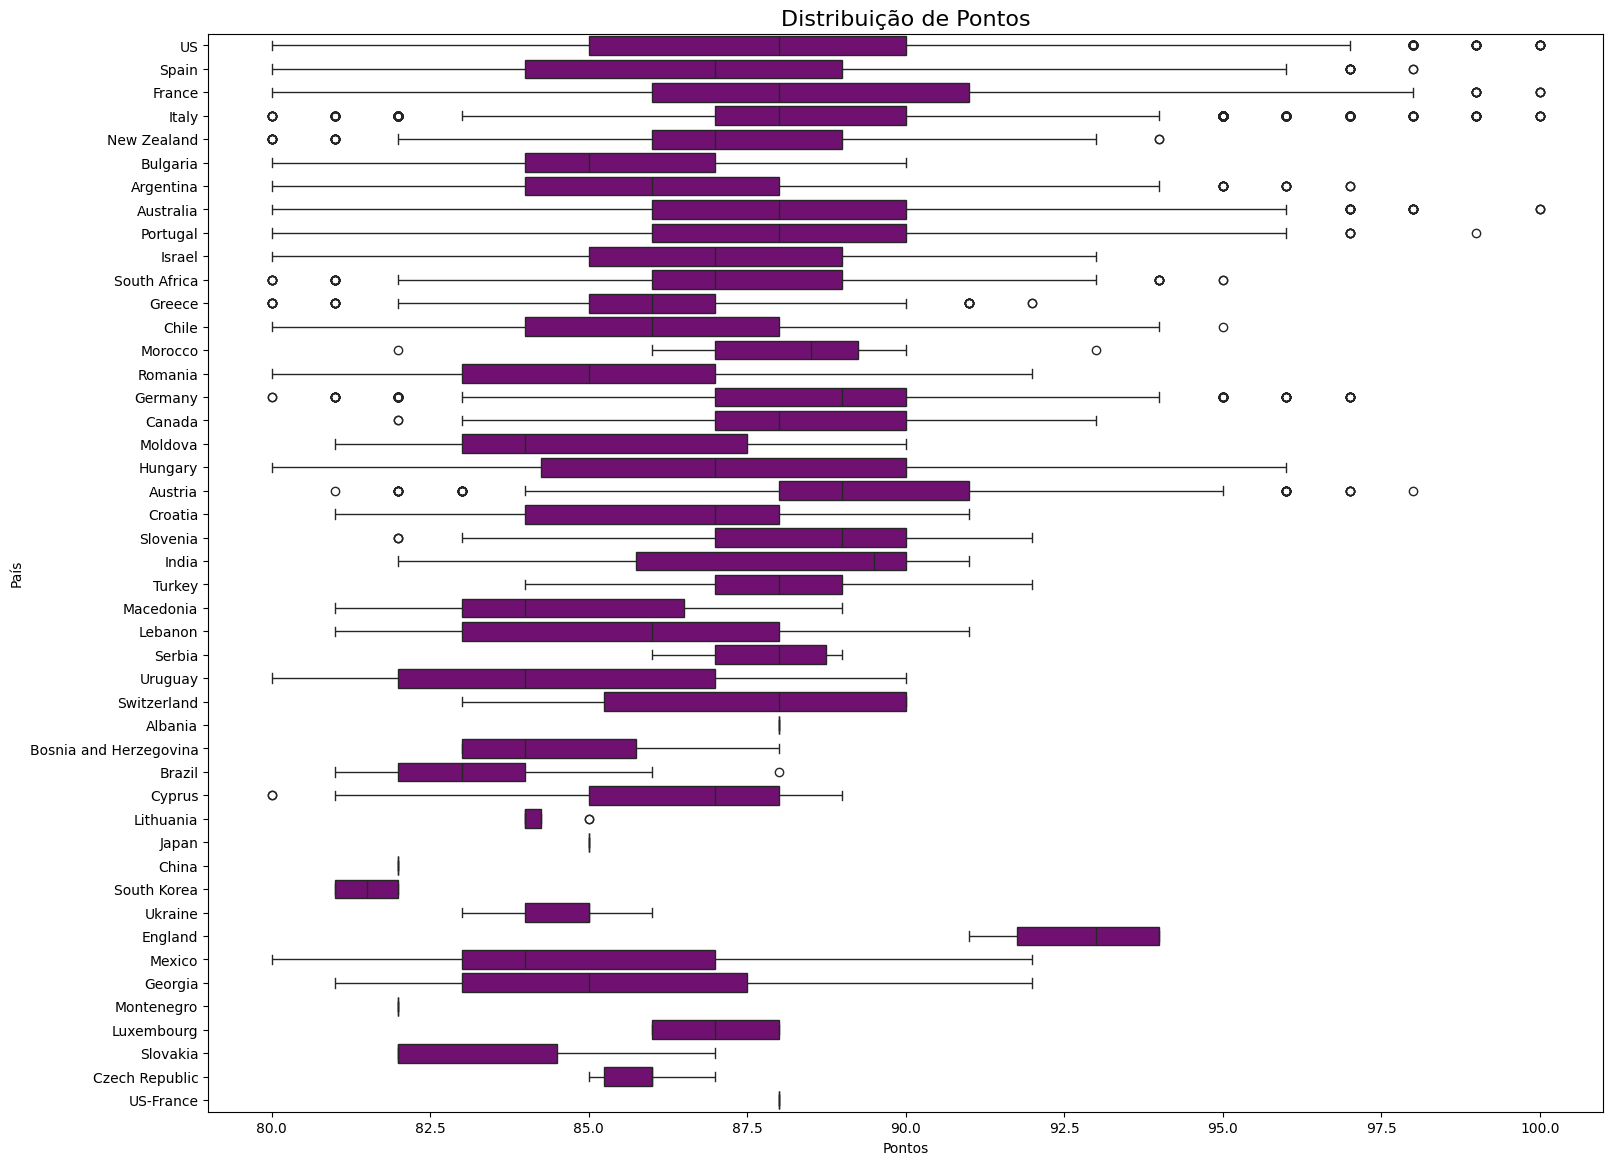

In [ ]:
plt.figure(figsize=(18,14))
sns.boxplot(data=df1, x='points', y='country', color='Purple')
plt.title('Distribuição de Pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País')
plt.show()

<ipython-input-148-3ab395142c70>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


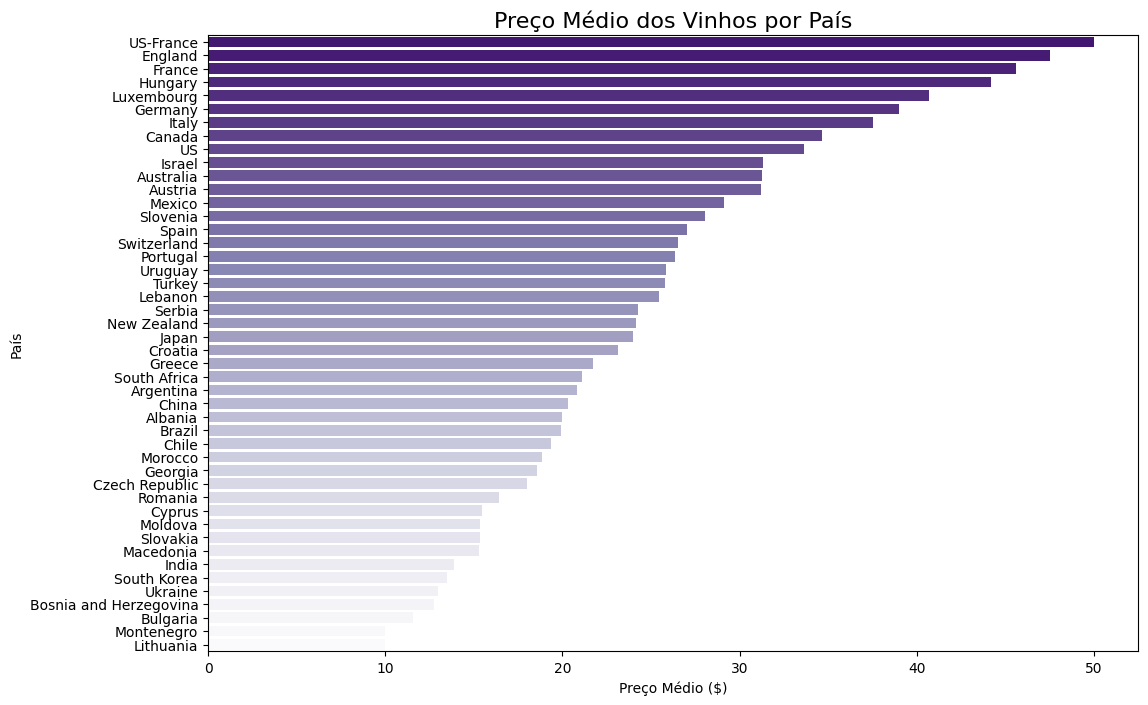

In [ ]:
preco_medio = df1.groupby('country')['price'].mean().sort_values(ascending=False)

y = preco_medio.index.to_series()
x = preco_medio.values

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço Médio dos Vinhos por País', fontsize=16)
plt.xlabel('Preço Médio ($)')
plt.ylabel('País')
plt.show()

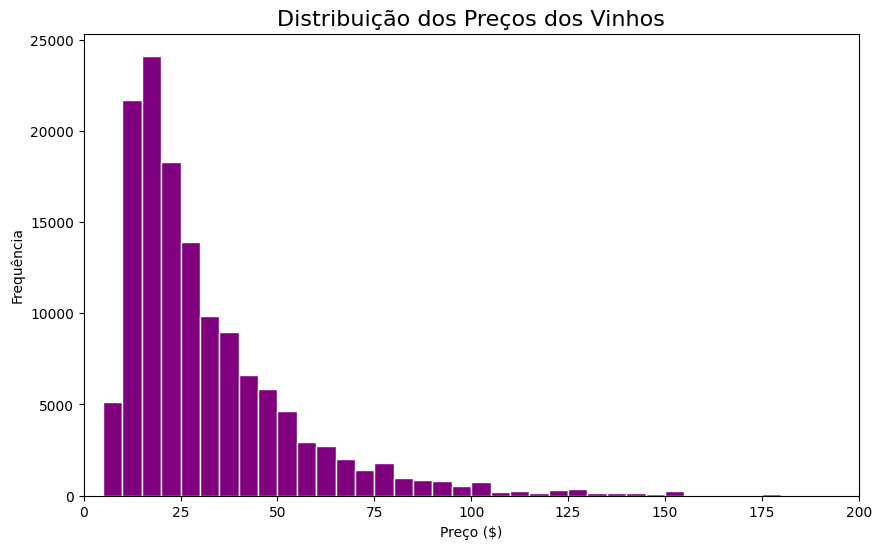

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.arange(0, df1['price'].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color='Purple', edgecolor='white')
plt.xlim(0, 200)
plt.title('Distribuição dos Preços dos Vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
np.log10(df1['price']).describe()

,price
count,137230.000000
mean,1.408752
std,0.287772
min,0.602060
25%,1.204120
50%,1.380211
75%,1.602060
max,3.361728


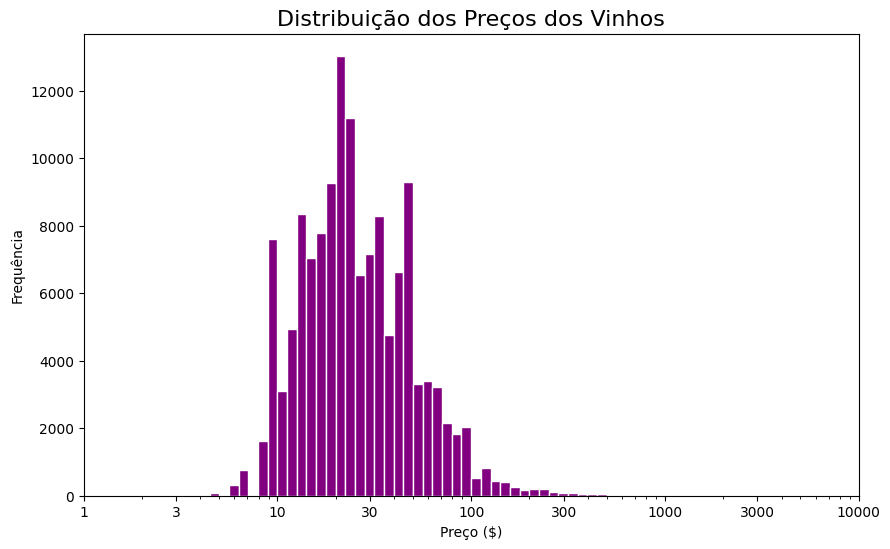

In [ ]:
plt.figure(figsize=(10, 6))
bins = 10 ** np.arange(0.6, 3.4 + 0.05, 0.05)
valores = [1,3,10,30,100,300,1000,3000,10000]
plt.hist(data=df1, x='price', bins=bins, color='Purple', edgecolor='white')
plt.title('Distribuição dos Preços dos Vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(valores, valores)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')
plt.show()

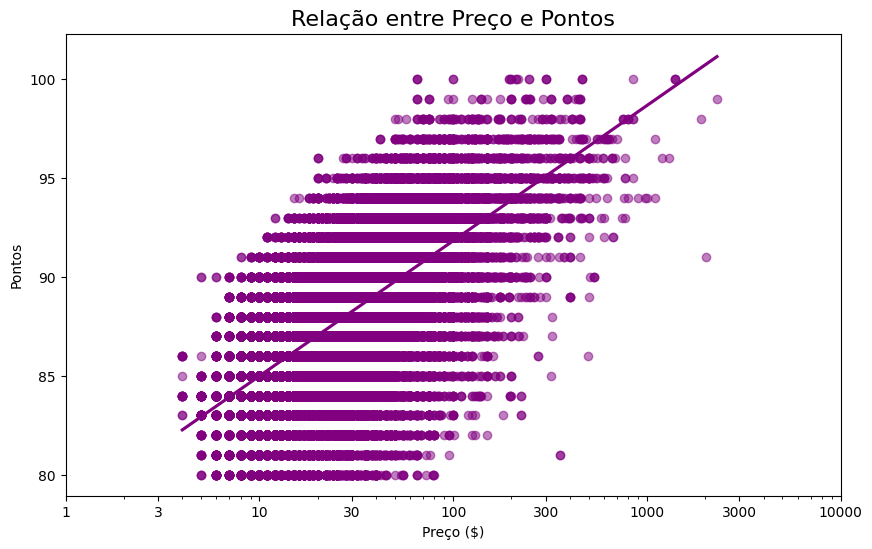

In [ ]:
x = [1,3,10,30,100,300,1000,3000,10000]

plt.figure(figsize=(10, 6))
sns.regplot(data=df1, x='price', y='points', color='Purple', logx=True, scatter_kws={'alpha': 0.5})
plt.title('Relação entre Preço e Pontos', fontsize=16)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel('Preço ($)')
plt.ylabel('Pontos')
plt.show()

In [ ]:
vinho_mais_caro = df1.loc[df1['price'].idxmax()]
vinho_mais_caro

,34920
country,France
description,"A big, powerful wine that sums up the richness..."
points,99
price,2300.0
province,Bordeaux
variety,Bordeaux-style Red Blend
winery,Château Latour


In [ ]:
vinho_mais_barato = df1.loc[df1['price'].idxmin()]
vinho_mais_barato

,1858
country,US
description,"Sweet and fruity, this canned wine feels soft ..."
points,83
price,4.0
province,California
variety,Chardonnay
winery,Pam's Cuties


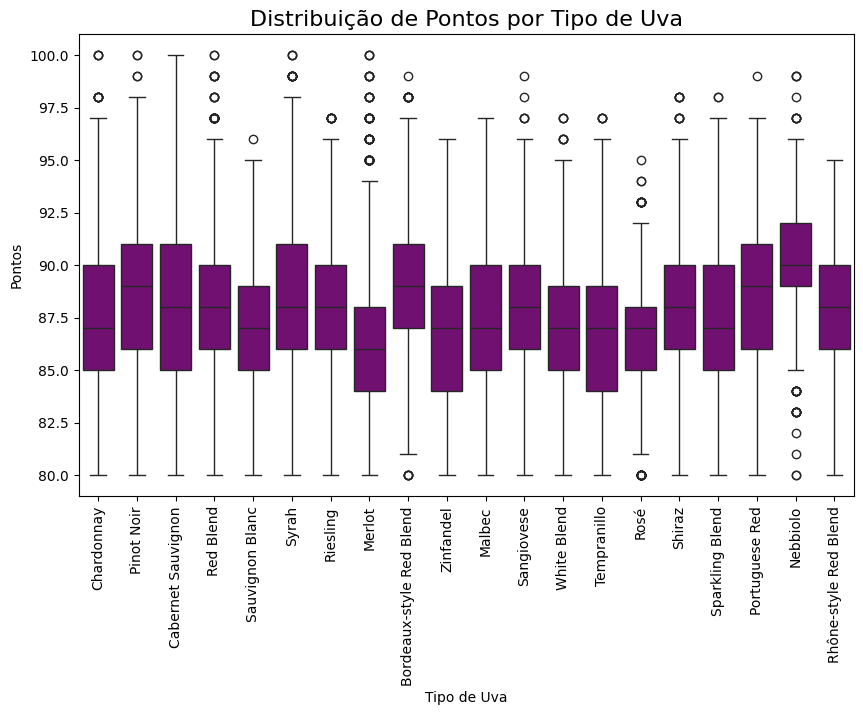

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='variety', y='points', color='Purple', order=df1['variety'].value_counts().iloc[:20].index)
plt.title('Distribuição de Pontos por Tipo de Uva', fontsize=16)
plt.xlabel('Tipo de Uva')
plt.ylabel('Pontos')
plt.xticks(rotation=90)
plt.show()

## Melhores Vinhos Por Faixa de Preço

*  Até 15 dólares
* Entre 15 a 30 dólares
* Entre 30 a 50 dólares
* Acima de 50 dólares

In [ ]:
# Top 10 vinhos custando até $15
df2 = df1.drop(['description','province','winery'], axis=1)
ate_15 = df2[df2['price'] <= 15]
ate_15 = ate_15.sort_values(by='points', ascending=False)[:10]
ate_15.style.background_gradient(cmap='YlOrBr_r', high=0.5, subset=['price'])

,country,points,price,variety
140179,Spain,94,15.000000,Pedro Ximénez
84950,US,93,15.000000,Riesling
35303,France,93,15.000000,Tannat
120170,US,93,15.000000,Riesling
68126,South Africa,93,15.000000,Cabernet Sauvignon
19580,US,93,15.000000,Riesling
130847,US,93,14.000000,Viognier
23924,Portugal,93,15.000000,Portuguese Red
83618,US,93,15.000000,Pinot Gris
142923,US,93,12.000000,Johannisberg Riesling


In [ ]:
# Top 10 vinhos custando entre $15 a $30
df2 = df1.drop(['description','province','winery'], axis=1)
ate_15 = df2[(df2['price'] >= 15) & (df2['price'] <= 30)]
ate_15 = ate_15.sort_values(by='points', ascending=False)[:10]
ate_15.style.background_gradient(cmap='YlOrBr_r', high=0.5, subset=['price'])

,country,points,price,variety
121313,US,96,28.000000,Chardonnay
81970,US,96,30.000000,Chardonnay
65333,US,96,28.000000,Chardonnay
116693,US,96,28.000000,Chardonnay
134101,US,96,20.000000,Syrah
109231,US,96,20.000000,Syrah
10541,Italy,96,27.000000,Red Blend
56971,US,96,20.000000,Syrah
137384,US,95,25.000000,Semillon-Sauvignon Blanc
94800,US,95,30.000000,Chardonnay


In [ ]:
# Top 10 vinhos custando entre $30 a $50
df2 = df1.drop(['description','province','winery'], axis=1)
ate_15 = df2[(df2['price'] >= 30) & (df2['price'] <= 50)]
ate_15 = ate_15.sort_values(by='points', ascending=False)[:10]
ate_15.style.background_gradient(cmap='YlOrBr_r', high=0.5, subset=['price'])

,country,points,price,variety
34924,US,98,50.000000,Bordeaux-style Red Blend
131161,US,97,42.000000,Chardonnay
127493,US,97,50.000000,Cabernet Sauvignon
55504,US,97,50.000000,Pinot Noir
98494,US,97,50.000000,Pinot Noir
104200,US,97,50.000000,Chardonnay
42803,US,97,50.000000,Chardonnay
121504,US,97,50.000000,Pinot Noir
70231,US,97,42.000000,Chardonnay
94921,US,97,42.000000,Chardonnay


In [ ]:
# Top 10 vinhos custando acima de $50
df2 = df1.drop(['description','province','winery'], axis=1)
ate_15 = df2[df2['price'] >= 50]
ate_15 = ate_15.sort_values(by='points', ascending=False)[:10]
ate_15.style.background_gradient(cmap='YlOrBr_r', high=0.5, subset=['price'])

,country,points,price,variety
28954,Italy,100,195.000000,Red Blend
89399,US,100,200.000000,Cabernet Sauvignon
119521,Italy,100,460.000000,Merlot
19355,Australia,100,300.000000,Muscat
19354,US,100,65.000000,Syrah
84034,US,100,65.000000,Syrah
122767,US,100,100.000000,Pinot Noir
2145,France,100,848.000000,Bordeaux-style White Blend
26296,France,100,1400.000000,Chardonnay
24151,Italy,100,460.000000,Merlot


## Conclusão

* **Qual país tem o melhor vinho?**
R: A Inglaterra possui maior pontução de avaliação, porém com uma quantidade menor de avaliação.

* **Existe relação entre o preço do vinho com  a qualidade?**
R: Existe uma relação, porém é possível achar outliers devido a natureza qualitativa da avaliação.

* **Existem tipos de uva de maior qualidade?**
R: Com base nos dados a uva do tipo 'Nebbiolo' é a maior aposta.

* **Qual o melhor vinho em cada faixa de preço?**
R: Verificar nos DataFrames gerados.